<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170,

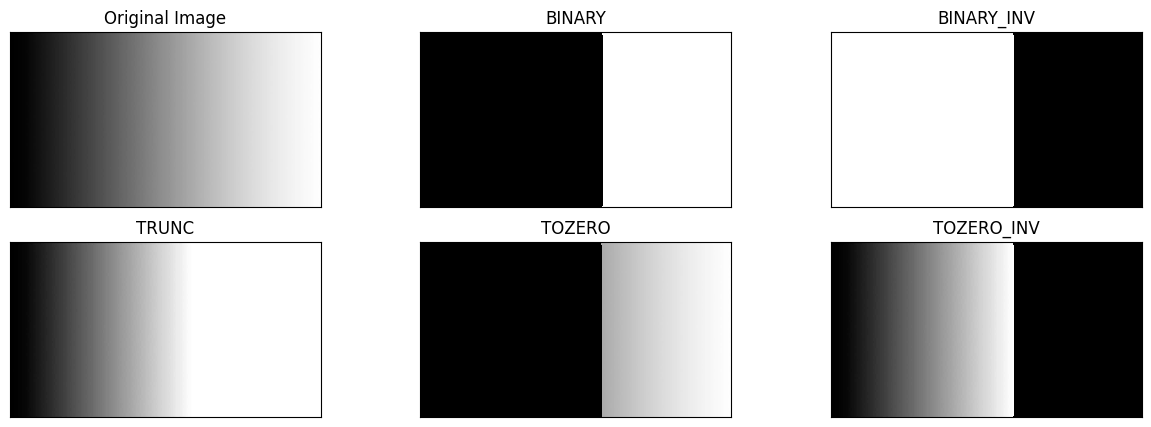

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('drive/MyDrive/PCVK_2024/gradient.jpg', 0)
thresh = 170  # nilai Threshold yang ditentukan

# 1. Binary
thresh1 = np.zeros_like(img)
thresh1[img > thresh] = 255

# 2. Binary Inverse
thresh2 = np.zeros_like(img)
thresh2[img <= thresh] = 255

# 3. Truncate
thresh3 = np.copy(img)
thresh3[img > thresh] = thresh

# 4. To Zero
thresh4 = np.copy(img)
thresh4[img < thresh] = 0

# 5. To Zero Inverse
thresh5 = np.copy(img)
thresh5[img > thresh] = 0

# Tampilkan hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


Otsu's Threshold

Nilai threshold Otsu yang ditemukan: 185


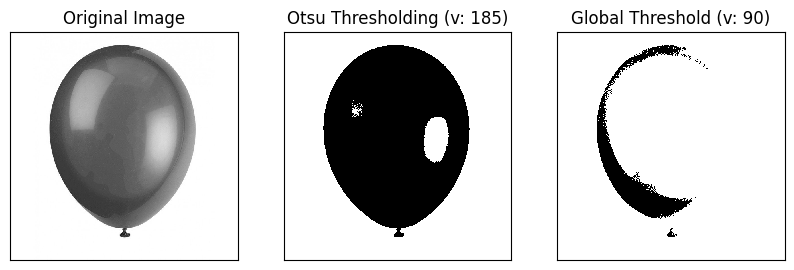

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar dalam grayscale
img = cv.imread('drive/MyDrive/PCVK_2024/balloon.jpg', 0)
global_thresh_val = 90

# Thresholding Global
global_thresh = np.zeros_like(img)
global_thresh[img > global_thresh_val] = 255

# Hitung histogram
hist = np.zeros(256)
for pixel in img.ravel():
    hist[pixel] += 1

# Total piksel
total = img.size

# Probabilitas kumulatif dan rata-rata kumulatif
sumB, wB = 0, 0
sum1 = np.dot(np.arange(256), hist)  # Total intensitas x jumlah piksel
max_variance, threshold = 0, 0

# Otsu's thresholding
for t in range(256):
    wB += hist[t]                   # Weight Background
    if wB == 0:
        continue
    wF = total - wB                  # Weight Foreground
    if wF == 0:
        break

    sumB += t * hist[t]
    mB = sumB / wB                   # Mean Background
    mF = (sum1 - sumB) / wF          # Mean Foreground

    # Between-class variance
    variance = wB * wF * (mB - mF) ** 2

    # Cari threshold dengan varians maksimum
    if variance > max_variance:
        max_variance = variance
        threshold = t

# Terapkan threshold Otsu
otsu_thresh = np.zeros_like(img)
otsu_thresh[img > threshold] = 255

# Tampilkan hasil
print(f"Nilai threshold Otsu yang ditemukan: {threshold}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray', interpolation='nearest')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(otsu_thresh, 'gray', interpolation='nearest')
plt.title(f'Otsu Thresholding (v: {threshold})')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(global_thresh, 'gray', interpolation='nearest')
plt.title(f'Global Threshold (v: 90)')
plt.xticks([]), plt.yticks([])

plt.show()


 histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja

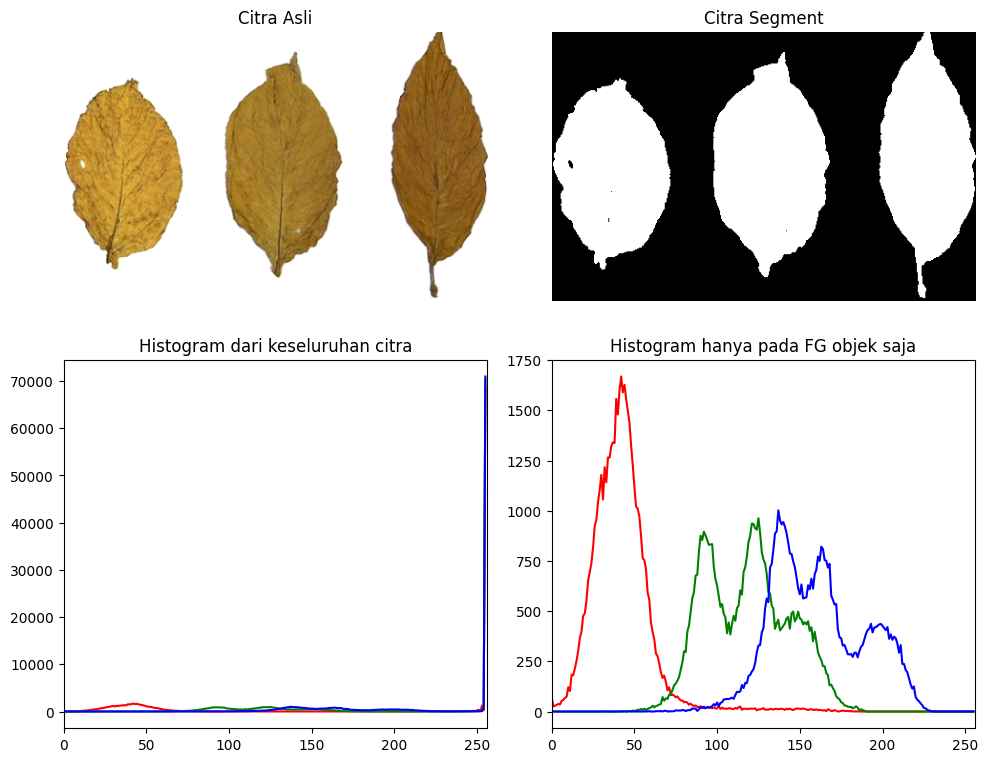

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
img = cv.imread('drive/MyDrive/PCVK_2024/tobacco.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Segmentasi menggunakan Otsu's thresholding untuk membuat mask biner
_, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Histogram keseluruhan citra
hist_full_r = cv.calcHist([img], [0], None, [256], [0, 256])
hist_full_g = cv.calcHist([img], [1], None, [256], [0, 256])
hist_full_b = cv.calcHist([img], [2], None, [256], [0, 256])

# Histogram hanya untuk foreground (menggunakan mask dari segmentasi Otsu)
hist_fg_r = cv.calcHist([img], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([img], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([img], [2], mask, [256], [0, 256])

# Menampilkan gambar asli dan citra segmen
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment')
plt.axis('off')

# Menampilkan histogram keseluruhan citra
plt.subplot(2, 2, 3)
plt.plot(hist_full_r, color='r')
plt.plot(hist_full_g, color='g')
plt.plot(hist_full_b, color='b')
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# Menampilkan histogram hanya pada foreground objek
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r')
plt.plot(hist_fg_g, color='g')
plt.plot(hist_fg_b, color='b')
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


Segmentasi peppers,K Means

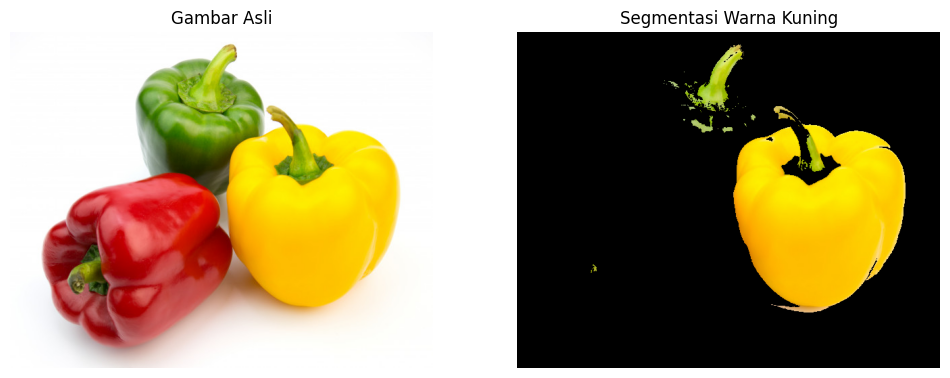

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
img = cv.imread('drive/MyDrive/PCVK_2024/peppers.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Ubah gambar menjadi 2D array untuk diterapkan K-Means
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# K-Means parameters
k = 3  # Jumlah kluster (dapat disesuaikan)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Ubah kembali nilai centroid ke tipe data uint8
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img_rgb.shape)

# Hanya tampilkan bagian dengan warna kuning (sesuaikan dengan nilai warna kuning)
yellow_cluster = np.where((centers[:, 0] > 200) & (centers[:, 1] > 200) & (centers[:, 2] < 100))[0][0]
mask = (labels == yellow_cluster).reshape(img_rgb.shape[:2])
yellow_segment = np.zeros_like(img_rgb)
yellow_segment[mask] = img_rgb[mask]

# Tampilkan hasil segmentasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(yellow_segment)
plt.title("Segmentasi Warna Kuning")
plt.axis('off')
plt.show()


Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa
hal itu terjadi!?

Salah satu kendala dalam segmentasi warna menggunakan K-Means adalah kesulitan untuk memastikan warna target (misalnya kuning) tidak tercampur dengan warna lain yang memiliki komponen RGB serupa. Hal ini dapat terjadi jika warna latar belakang atau objek lainnya memiliki komposisi warna yang hampir mirip dengan warna target, yang membuat segmentasi tidak sepenuhnya akurat.

Crossword Threshold

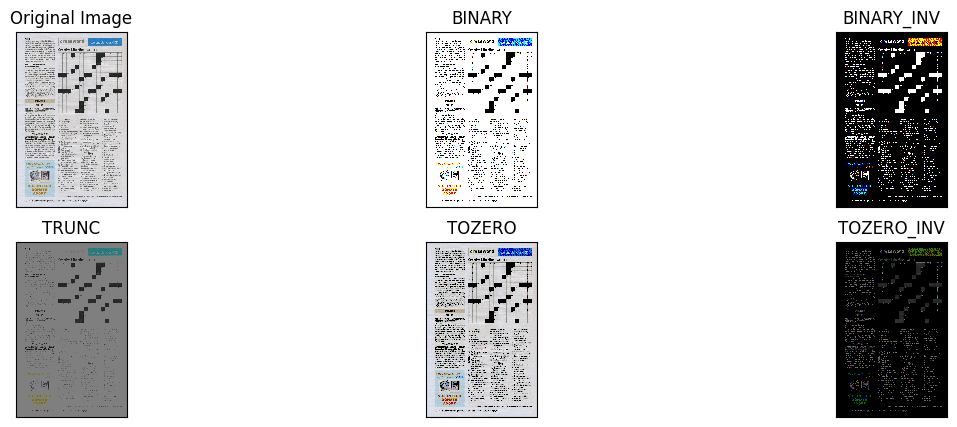

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('drive/MyDrive/PCVK_2024/crossword.jpg')
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 Binary
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2  binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

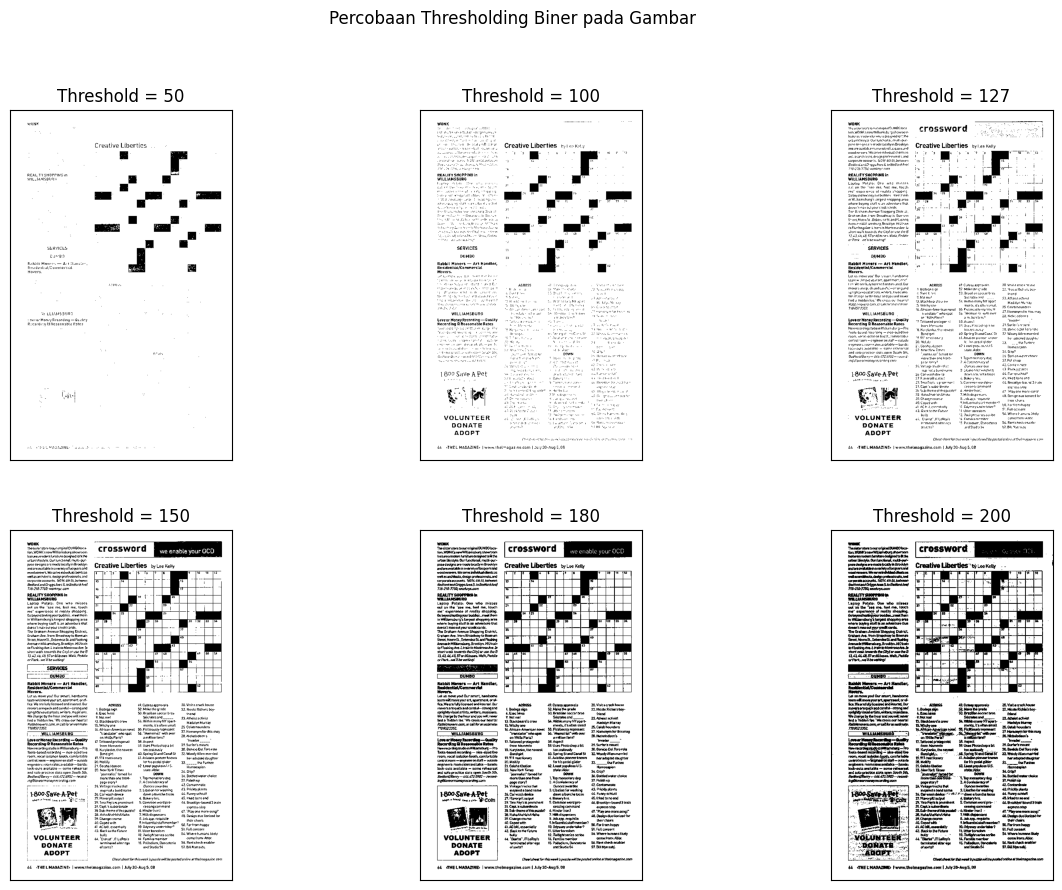

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
img = cv.imread('drive/MyDrive/PCVK_2024/crossword.jpg', cv.IMREAD_GRAYSCALE)

# Daftar nilai threshold yang ingin dicoba
threshold_values = [50, 100, 127, 150, 180, 200]

plt.figure(figsize=(15, 10))

for i, thresh in enumerate(threshold_values, 1):
    # Thresholding biner
    ret, thresh_img = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)

    # Menampilkan hasil
    plt.subplot(2, 3, i)
    plt.imshow(thresh_img, 'gray')
    plt.title(f'Threshold = {thresh}')
    plt.xticks([]), plt.yticks([])

plt.suptitle('Percobaan Thresholding Biner pada Gambar')
plt.show()
